In [32]:
import matplotlib.pyplot as plt
import tensorflow as tf   
import numpy as np

#### 1. 读取图片

In [33]:
image_raw_data = tf.gfile.FastGFile("../../datasets/cat.jpg",'rb').read() # 表示要读写二进制数据

with tf.Session() as sess:
    
    # 使用tf.image.decode_jpeg解码jpeg格式图片
    img_data = tf.image.decode_jpeg(image_raw_data)
    
    # 输出解码之后的三维矩阵。
    print(img_data.eval())   # eval() 方法可以查看张量的具体数值，该方法返回 一个numpy数组
    img_data.set_shape([1797, 2673, 3]) # img_data.eval().shape
    print(img_data.get_shape())

[[[162 161 140]
  [162 162 138]
  [161 161 137]
  ..., 
  [106 140  46]
  [101 137  47]
  [102 141  52]]

 [[164 162 139]
  [163 161 136]
  [163 161 138]
  ..., 
  [104 138  43]
  [102 139  46]
  [108 138  50]]

 [[165 163 140]
  [165 163 138]
  [163 161 136]
  ..., 
  [104 135  41]
  [102 137  43]
  [108 139  45]]

 ..., 
 [[207 200 181]
  [206 199 180]
  [206 199 180]
  ..., 
  [109  84  53]
  [107  84  53]
  [106  81  50]]

 [[205 200 180]
  [205 200 180]
  [206 199 180]
  ..., 
  [106  83  49]
  [105  82  51]
  [106  81  50]]

 [[205 200 180]
  [205 198 179]
  [205 198 179]
  ..., 
  [108  86  49]
  [105  82  48]
  [104  81  49]]]
(1797, 2673, 3)


#### 2. 打印图片

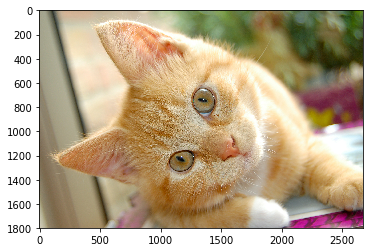

In [34]:
with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.show()

#### 3. 保存图片

In [35]:
with tf.Session() as sess:
    
    # 使用tf.image.encode_png编码图片数据（JPEG->PNG)
    encoded_image = tf.image.encode_png(img_data)
    with tf.gfile.GFile("../../datasets/cat.png", 'wb') as f:
        f.write(encoded_image.eval())

#### 4. 重新调整图片大小

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


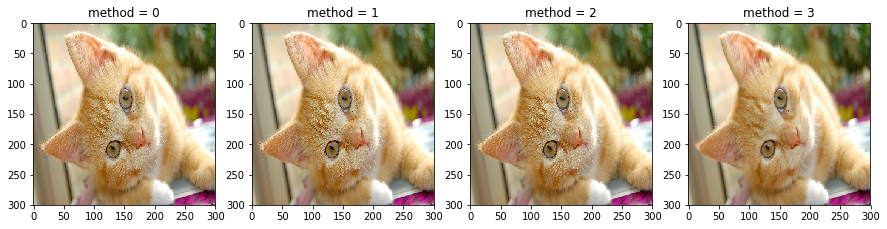

In [36]:
with tf.Session() as sess:
    # 如果直接以0-255范围的整数数据输入resize_images，那么输出将是0-255之间的实数，
    # 不利于后续处理。本书建议在调整图片大小前，先将图片转为0-1范围的实数。
    img_data_float = tf.image.convert_image_dtype(img_data, tf.float32)
    plt.figure(figsize = (15, 15))
    for i in range(4):
        resized = tf.image.resize_images(img_data_float, [300, 300], method=i) # 原大小：2673 x 1797
        plt.subplot(1, 4, i + 1)
        plt.title("method = " + str(i))
        plt.imshow(resized.eval())
    plt.show()

#### 5. 裁剪和填充图片

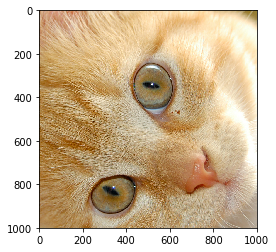

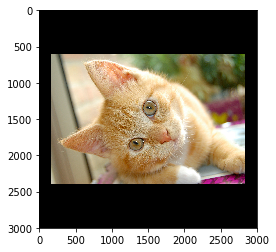

In [37]:
with tf.Session() as sess: 
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 1000, 1000)
    padded = tf.image.resize_image_with_crop_or_pad(img_data, 3000, 3000)
    plt.imshow(croped.eval())
    plt.show()
    plt.imshow(padded.eval())
    plt.show()

#### 6. 截取中间50%的图片

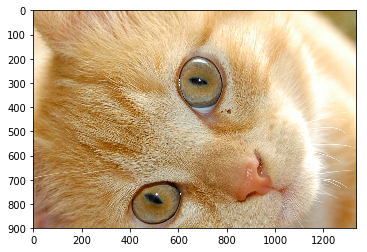

In [38]:
with tf.Session() as sess:   
    central_cropped = tf.image.central_crop(img_data, 0.5)
    plt.imshow(central_cropped.eval())
    plt.show()

#### 7. 翻转图片

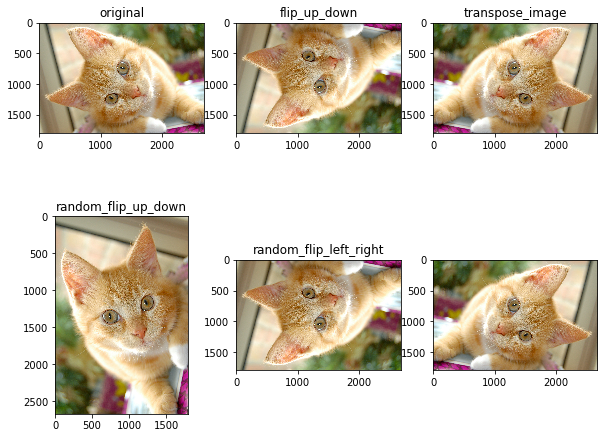

In [39]:
with tf.Session() as sess: 
    
    plt.figure(figsize = (10, 8))
    
    # 原图
    plt.subplot(2, 3, 1)
    plt.title("original")
    plt.imshow(img_data.eval())
    
    # 上下翻转
    plt.subplot(2, 3, 2)
    plt.title("flip_up_down")
    flipped1 = tf.image.flip_up_down(img_data)
    plt.imshow(flipped1.eval())
    
    # 左右翻转
    plt.subplot(2, 3, 3)
    plt.title("flip_left_right")
    flipped2 = tf.image.flip_left_right(img_data)
    plt.imshow(flipped2.eval())
    
    # 对角线翻转
    plt.title("transpose_image")
    plt.subplot(2, 3, 4)
    transposed = tf.image.transpose_image(img_data)
    plt.imshow(transposed.eval())
    
    # 以一定概率上下翻转图片
    plt.title("random_flip_up_down")
    plt.subplot(2, 3, 5)
    flipped3 = tf.image.random_flip_up_down(img_data)
    plt.imshow(flipped3.eval())
    
    # 以一定概率左右翻转图片
    plt.title("random_flip_left_right")
    plt.subplot(2, 3, 6)
    flipped4 = tf.image.random_flip_left_right(img_data)
    plt.imshow(flipped4.eval())
    plt.imshow(flipped4.eval())
    plt.show()

#### 7. 图片色彩调整

> 注意：

> tf.image.convert_image_dtype

> tf.clip_by_value

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image_float = 
[[[ 0.63529414  0.63137257  0.54901963]
  [ 0.63529414  0.63529414  0.5411765 ]
  [ 0.63137257  0.63137257  0.53725493]
  ..., 
  [ 0.41568631  0.54901963  0.18039216]
  [ 0.39607847  0.53725493  0.18431373]
  [ 0.40000004  0.5529412   0.20392159]]

 [[ 0.64313728  0.63529414  0.54509807]
  [ 0.63921571  0.63137257  0.53333336]
  [ 0.63921571  0.63137257  0.5411765 ]
  ..., 
  [ 0.40784317  0.5411765   0.16862746]
  [ 0.40000004  0.54509807  0.18039216]
  [ 0.42352945  0.5411765   0.19607845]]

 [[ 0.64705884  0.63921571  0.54901963]
  [ 0.64705884  0.63921571  0.5411765 ]
  [ 0.63921571  0.63137257  0.53333336]
  ..., 
  [ 0.40784317  0.52941179  0.16078432]
  [ 0.40000004  0.53725493  0.16862746]
  [ 0.42352945  0.54509807  0.17647059]]

 ..., 
 [[ 0.81176478  0.7843138   0.70980394]
  [ 0.80784321  0.78039223  0.70588237]
  [ 0.80784321  0.78039223  0.70588237]
  ..., 
  [ 0.42745101  0.32941177  0.20784315]
  [ 0.41960788  0.32941177  0.20784315]
  [ 0.41568631  0.31

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


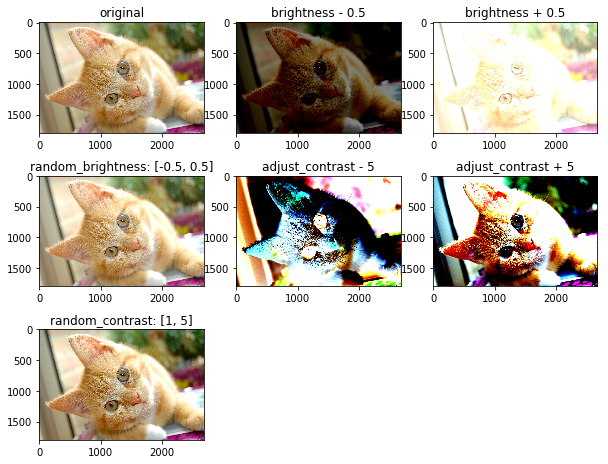

In [40]:
with tf.Session() as sess:
    
    plt.figure(figsize = (10, 8))
    
    # 原图
    plt.subplot(3, 3, 1)
    plt.title("original")
    plt.imshow(img_data.eval())
    
    # 在进行一系列图片调整前，先将图片转换为实数形式，有利于保持计算精度。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
    # 将图片的亮度-0.5。
    plt.subplot(3, 3, 2)
    plt.title("brightness - 0.5")
    adjusted1 = tf.image.adjust_brightness(image_float, -0.5)
    plt.imshow(adjusted1.eval())
    
    # 将图片的亮度+0.5
    plt.subplot(3, 3, 3)
    plt.title("brightness + 0.5")
    adjusted2 = tf.image.adjust_brightness(image_float, 0.5)
    plt.imshow(adjusted2.eval())
    
    # 在[-max_delta, max_delta)的范围随机调整图片的亮度。
    plt.subplot(3, 3, 4)
    plt.title("random_brightness: [-0.5, 0.5]")
    adjusted3 = tf.image.random_brightness(image_float, max_delta=0.5, seed=tf.set_random_seed(12))
    plt.imshow(adjusted3.eval())
    
    # 将图片的对比度-5
    plt.subplot(3, 3, 5)
    plt.title("adjust_contrast - 5")
    adjusted4 = tf.image.adjust_contrast(image_float, -5)
    plt.imshow(adjusted4.eval())
    print("image_float = ")
    print(image_float.eval())
    print("adjusted4 = " )
    print(adjusted4.eval())
    cliped_adjusted4 = tf.clip_by_value(adjusted4, 0.0, 1.0)
    print("cliped_adjusted4 = " )
    print(cliped_adjusted4.eval())
    
    # 将图片的对比度+5
    plt.subplot(3, 3, 6)
    plt.title("adjust_contrast + 5")
    adjusted5 = tf.image.adjust_contrast(image_float, 5)
    plt.imshow(adjusted5.eval())
    
    # 在[lower, upper]的范围随机调整图的对比度
    plt.subplot(3, 3, 7)
    plt.title("random_contrast: [1, 5]")
    adjusted6 = tf.image.random_contrast(image_float, 1, 5)
    plt.imshow(adjusted6.eval())
    plt.show()

#### 8. 添加色相和饱和度

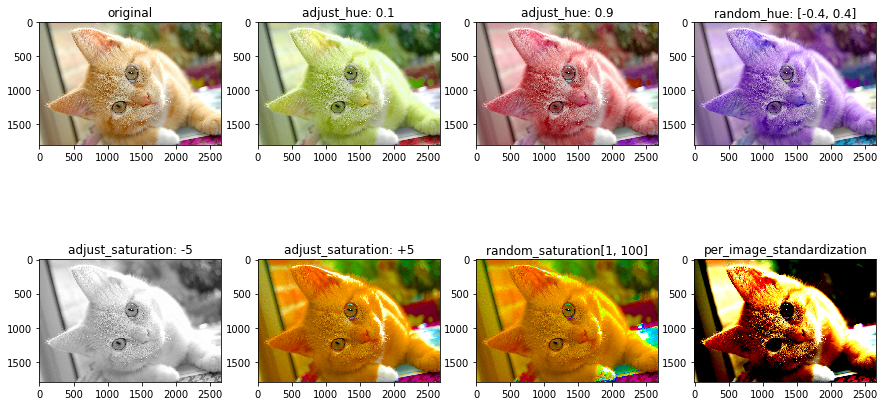

In [41]:
with tf.Session() as sess:
    # 在进行一系列图片调整前，先将图片转换为实数形式，有利于保持计算精度。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
    plt.figure(figsize = (15, 8))
    
    # 原图
    plt.subplot(2, 4, 1)
    plt.title("original")
    plt.imshow(img_data.eval())
    
    # 设置色相为0.1
    plt.subplot(2, 4, 2)
    plt.title("adjust_hue: 0.1")
    adjusted1 = tf.image.adjust_hue(image_float, 0.1)
    plt.imshow(tf.clip_by_value(adjusted1, 0.0, 1.0).eval())
    
    # 设置色相为0.9
    plt.subplot(2, 4, 3)
    plt.title("adjust_hue: 0.9")
    adjusted2 = tf.image.adjust_hue(image_float, 0.9)
    plt.imshow(tf.clip_by_value(adjusted2, 0.0, 1.0).eval())
    
    # 在[-max_delta, max_delta]的范围随机调整图片的色相。max_delta的取值在[0, 0.5]之间。
    plt.subplot(2, 4, 4)
    plt.title("random_hue: [-0.4, 0.4]")
    adjusted3 = tf.image.random_hue(image_float, 0.4)
    plt.imshow(tf.clip_by_value(adjusted3, 0.0, 1.0).eval())
    
    # 将图片的饱和度-5
    plt.subplot(2, 4, 5)
    plt.title("adjust_saturation: -5")
    adjusted4 = tf.image.adjust_saturation(image_float, -5)
    plt.imshow(tf.clip_by_value(adjusted4, 0.0, 1.0).eval())
    
    # 将图片的饱和度+5
    plt.subplot(2, 4, 6)
    plt.title("adjust_saturation: +5")
    adjusted5 = tf.image.adjust_saturation(image_float, 5)
    plt.imshow(tf.clip_by_value(adjusted5, 0.0, 1.0).eval())
    
    # 在[lower, upper]的范围随机调整图的饱和度
    plt.subplot(2, 4, 7)
    plt.title("random_saturation[1, 100]")
    adjusted6 = tf.image.random_saturation(image_float, 1, 100)
    plt.imshow(tf.clip_by_value(adjusted6, 0.0, 1.0).eval())
    
    # 将代表一张图片的三维矩阵中的数字均值变为0，方差变为1
    plt.subplot(2, 4, 8)
    plt.title("per_image_standardization")
    adjusted7 = tf.image.per_image_standardization(image_float)
    plt.imshow(tf.clip_by_value(adjusted7, 0.0, 1.0).eval())
    
    plt.show()

#### 9. 添加标注框并裁减

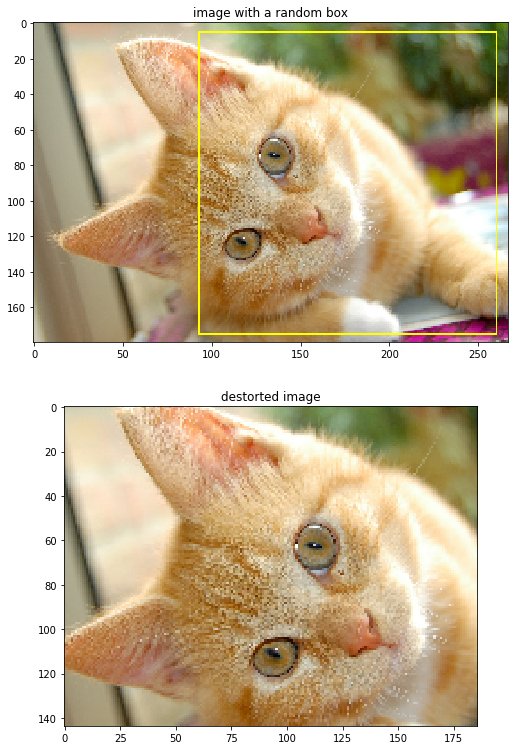

In [42]:
with tf.Session() as sess:         
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    
    # sample_distorted_bounding_box要求输入图片必须是实数类型。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32) # uint8 -> float

    # 在原图上用标注框画出截取的范围。由于原图的分辨率较大（2673x1797)，生成的标注框 
    # 在Jupyter Notebook上通常因边框过细而无法分辨，这里为了演示方便先缩小分辨率。
    image_small = tf.image.resize_images(image_float, [180, 267], method=0)
    
    # Generate a single distorted bounding box.
    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(image_small),
        bounding_boxes=boxes,
        min_object_covered=0.1)
    
    # Draw the bounding box in an image summary.
    image_with_box = tf.image.draw_bounding_boxes(tf.expand_dims(image_small, 0),
                                                  bbox_for_draw)
    
    tf.summary.image('images_with_box', image_with_box)

    # Employ the bounding box to distort the image.
    distorted_image = tf.slice(image_small, begin, size)
    
    plt.figure(figsize = (30, 20))
    plt.subplot(3, 1, 1)
    plt.title("image with a random box")
    plt.imshow(image_with_box[0].eval())
    
    plt.subplot(3, 1, 2)
    plt.title("destorted image")
    plt.imshow(distorted_image.eval())
plt.show()

#### 修改后的代码

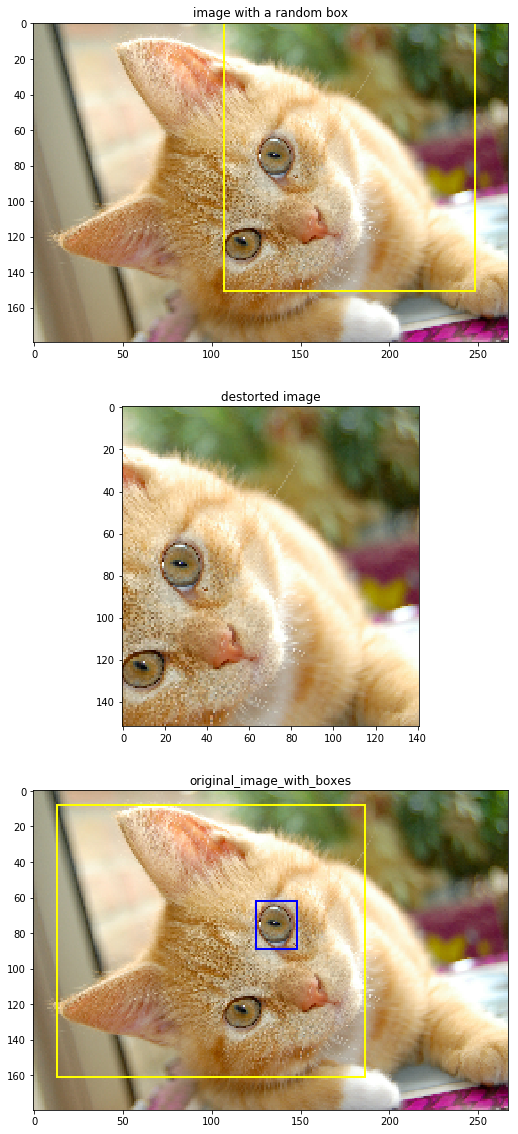

In [43]:
with tf.Session() as sess:         
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    
    # sample_distorted_bounding_box要求输入图片必须是实数类型。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32) # uint8 -> float

    # 在原图上用标注框画出截取的范围。由于原图的分辨率较大（2673x1797)，生成的标注框 
    # 在Jupyter Notebook上通常因边框过细而无法分辨，这里为了演示方便先缩小分辨率。
    image_small = tf.image.resize_images(image_float, [180, 267], method=0)
    
    # Generate a single distorted bounding box.
    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(image_small),
        bounding_boxes=boxes,
        min_object_covered=0.3)
    
    # Draw the bounding box in an image summary.
    image_with_box = tf.image.draw_bounding_boxes(tf.expand_dims(image_small, 0),
                                                  bbox_for_draw)

    # Employ the bounding box to distort the image.
    distorted_image = tf.slice(image_small, begin, size)

    # plot
    result = sess.run([image_with_box[0], distorted_image])
    plt.figure(figsize = (30, 20))
    plt.subplot(3, 1, 1)
    plt.title("image with a random box")
    plt.imshow(result[0])
    
    plt.subplot(3, 1, 2)
    plt.title("destorted image")
    plt.imshow(result[1])
    
    plt.subplot(313)
    plt.title('original_image_with_boxes')
    original_image_with_boxes = tf.image.draw_bounding_boxes(tf.expand_dims(image_small, 0),
                                                  boxes)
    plt.imshow(original_image_with_boxes[0].eval())
plt.show()

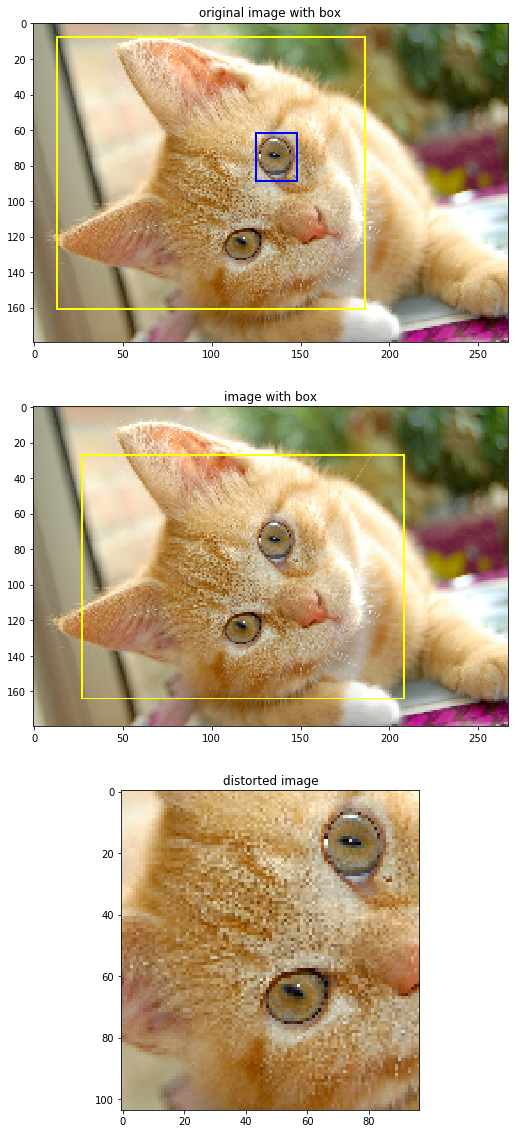

In [44]:
with tf.Session() as sess:         
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    
    # sample_distorted_bounding_box要求输入图片必须是实数类型。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32) # uint8 -> float

    # 在原图上用标注框画出截取的范围。由于原图的分辨率较大（2673x1797)，生成的标注框 
    # 在Jupyter Notebook上通常因边框过细而无法分辨，这里为了演示方便先缩小分辨率。
    image_small = tf.image.resize_images(image_float, [180, 267], method=0)
    
    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(image_small), bounding_boxes=boxes, min_object_covered=0)
    
    # 扩展维度4-D
    batched = tf.expand_dims(image_small, 0)
#     print("batched = ")
#     print(batched.eval())

    # 加入标注框
    image_with_boxes = tf.image.draw_bounding_boxes(batched, bbox_for_draw)
    
    # 裁剪
    distorted_image = tf.slice(image_small, begin, size)
    
    # 画图
    plt.figure(figsize = (30, 20))
    plt.subplot(3, 1, 1)
    original_image_with_box = tf.image.draw_bounding_boxes(batched, boxes)
    plt.title("original image with box")
    plt.imshow(original_image_with_box[0].eval())
    
    plt.subplot(3, 1, 2)
    plt.title("image with box")
#     plt.plot(267 * 0.05, 180 * 0.05, 'ro')
#     plt.plot(begin.eval()[1], begin.eval()[0], 'bo')
    plt.imshow(image_with_boxes[0].eval())
#     print(image_with_boxes)
#     print(image_with_boxes.eval())
#     print("start coodinate: (%f, %f)" % (267 * 0.05, 180 * 0.05))
#     print("begin = ")
#     print(begin.eval())
#     print("size = ")
#     print(size.eval())
#     print("bbox_for_draw = ")
#     print(bbox_for_draw.eval())

    
    
    plt.subplot(3, 1, 3)
    plt.title("distorted image")
    plt.imshow(distorted_image.eval())